Riya & Austin<br/>Section 3

# Question

### What would happen if Olin students kept coming to class during an meningococcal meningitis outbreak?

# Model

&nbsp; &nbsp; &nbsp; Initially, when choosing our model, we looked at a variety of different diseases, before remembering an interesting discovery relating to the vaccination policy at Olin. Students are not required to receive the meningococcal meningitis if they sign a waiver acknowledging the risks of the disease. As a result, a case (albeit an unlikely one) could arise where an entire student body could choose to opt out of this vaccine, and leave themselves susceptible to an outbreak. While this assumption is valid in that it is possible, with a student body like the students at Olin, it isn’t very likely. </br>

&nbsp; &nbsp; &nbsp; In regard to Olin, we standardized the population to three hundred and sixty students, and assumed that the average Olin student is in contact with 25 students per day on average. We chose these based on our own estimations of class size, and personal experiences with students interacting with others on a daily basis. Additionally, as from our limited experience with the students around us, we assumed that Olin students would continue to come to class if they felt a bit under the weather, as people tend to feel in the incubation period of meningococcal meningitis. </br>

&nbsp; &nbsp; &nbsp; One of the biggest assumptions we had to make was in regard to the contagion rate of the disease. After much research, we discovered that there doesn’t seem to sufficient information on the rates of infection or contagion in relation to meningococcal meningitis, so we looked for other avenues of validating our rates. We instead assumed it would be accurate to base our transmission rate on that of a similarly spread disease, influenza. We multiplied the average rate of contagion of influenza by a proportion of the lifetime of meningococcal meningitis bacteria to that of the influenza bacteria, to adjust for the actual rate of transmission.</br>


### Setting up the environment

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import matplotlib.pyplot as plt


# import functions from the modsim.py module
from modsim import *

In [2]:
'''
S: Susceptible
Q: Quarantine
C: Coming to class
R: Recovered
D: Dead XP
'''

init = State(S=360, Q=0, C=2, R=0, D=0)

,values
S,360
Q,0
C,2
R,0
D,0


In [3]:
'''
i: contagion rate
p: proportion quarantined
alpha: quarantined recovery rate
beta: quarantined death rate
'''

system = System(
    i=0.1 * 5/24 * 25,
    g=0.07,
    alpha=0.4,
    beta=0.1,
)

,values
i,0.520833
g,0.070000
alpha,0.400000
beta,0.100000


In [4]:
def update_func(state, system, dt=1):
    unpack(state)
    unpack(system)
    
    if S <= 0:
        delta = 0
    else:
        delta = i/S

    infections = min([S * C * delta, S])
    recoveries = min([Q*alpha, 360])
    deaths     = min([Q*beta, 360])
    
    
    dSdt = -infections * dt
    dCdt = (infections - C*g) * dt
    dQdt = (C*g - Q*alpha - Q*beta) * dt
    dRdt = (recoveries) * dt
    dDdt = (deaths) * dt
    
    s,q,c,r,d = S,Q,C,R,D
    
    return State(
        S = s + dSdt,
        Q = q + dQdt,
        C = c + dCdt,
        R = r + dRdt,
        D = d + dDdt
    )

In [5]:
def run_simulation(system, init, t_end, dt):
    unpack(system)
    
    results = TimeFrame(columns=init.index)
    results.row[0] = init
    
    for t in linrange(0, t_end, dt):
        results.row[t+dt] = update_func(results.row[t], system, dt)
    
    return results

In [6]:
def plot_results(results):
    plot(results['S'], '-', label='Susceptible')
    plot(results['C'], '--', label='Coming to class')
    plot(results['Q'], ':', label='Quarantined')
    plot(results['R'], '.-', label='Recovered')
    plot(results['D'], '.--', label='Dead')
    decorate(xlabel='Time (days)', ylabel='Population')

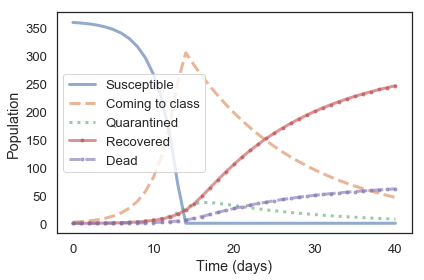

In [7]:
results = run_simulation(system, init, 40, 1)
plot_results(results)

In [27]:
def sweep_param(system, init, t_end, dt, param, output, values, calc = lambda x: x):
    from copy import deepcopy
    
    sweep_results = SweepSeries()
    
    for val in values:
        sweep_system = deepcopy(system)
        sweep_system[param] = calc(val)
        sweep_results[val] = run_simulation(sweep_system, init, t_end, dt)[output]
    
    return sweep_results

In [67]:
def plot_sweep(sweep_results, title, xlabel, ylabel):
    from colour import Color
    purple = Color('purple')
    color_range = list(purple.range_to(Color('red'), len(sweep_results.index)))
    
    for (entry,color,val) in zip(sweep_results, color_range, sweep_results.index):
        plot(entry, color=color.rgb, label=str(round(val,3)))
    decorate(title=title, xlabel=xlabel, ylabel=ylabel)

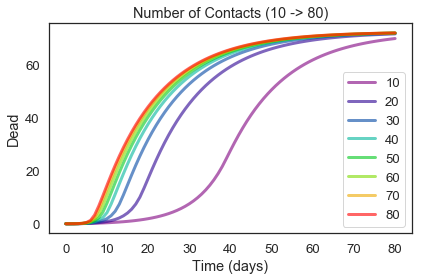

In [72]:
contact_range = linrange(10,80,10,endpoint=True)
sweep_results = sweep_param(system, init, 80, 1, 'i', 'D', contact_range, lambda x: 0.1 * 5/24 * x)
plot_sweep(sweep_results, 'Number of Contacts (10 -> 80)', 'Time (days)', 'Dead')

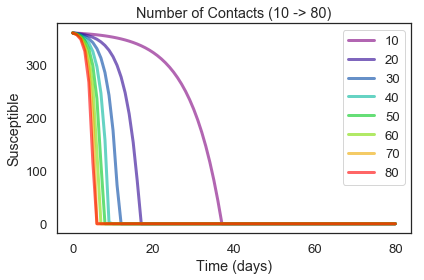

In [73]:
sweep_results = sweep_param(system, init, 80, 1, 'i', 'S', contact_range, lambda x: 0.1 * 5/24 * x)
plot_sweep(sweep_results, 'Number of Contacts (10 -> 80)', 'Time (days)', 'Susceptible')

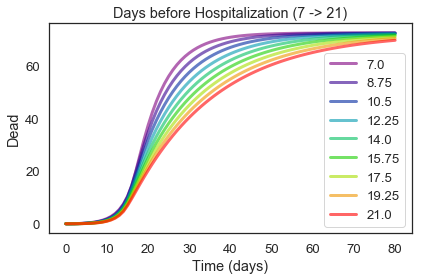

In [77]:
g_day_range = linspace(7, 21, 9, endpoint=True)
sweep_results = sweep_param(system, init, 80, 1, 'g', 'D', g_day_range, lambda x: 1/x)
plot_sweep(sweep_results, 'Days before Hospitalization (7 -> 21)', 'Time (days)', 'Dead')

# Results

# Interpretation